In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt
import re

In [2]:
df1415 = pd.read_csv("2014-2015.csv")
df1516 = pd.read_csv("2015-2016.csv")
df1617 = pd.read_csv("2016-2017.csv")
df1718 = pd.read_csv("2017-2018.csv")
df1819 = pd.read_csv("2018-2019.csv")
df1920 = pd.read_csv("2019-2020.csv")

In [3]:
df1415['season'] = '2014-2015'
df1516['season'] = '2015-2016'
df1617['season'] = '2016-2017'
df1718['season'] = '2017-2018'
df1819['season'] = '2018-2019'
df1920['season'] = '2019-2020'

In [4]:
df1415.head(12)

,Unnamed: 0,player_name,teams_played_for,league,games,minutes_played,goals,npg,assists,xG,xA,npxG,xG90,xA90,npxG90,position,shots,key_passes,yellow_cards,red_cards,xGBuildup,xGChain,season
0,0,Sergio Agüero,Manchester City,EPL,33,2551,26,21,8,25.270160,5.568922,20.703184,0.891538,0.196473,0.730414,F S,148,33,4,0,6.878173,27.805155,2014-2015
1,1,Harry Kane,Tottenham,EPL,34,2589,21,19,4,17.157292,3.922501,14.873823,0.596430,0.136356,0.517051,F M S,112,27,4,0,5.549699,16.488439,2014-2015
2,2,Diego Costa,Chelsea,EPL,26,2111,20,19,3,15.219104,4.554671,14.457935,0.648849,0.194183,0.616397,F S,76,41,8,0,5.276973,21.365790,2014-2015
3,3,Charlie Austin,Queens Park Rangers,EPL,35,3078,18,15,5,17.881850,2.548747,14.076043,0.522861,0.074525,0.411580,F,131,23,4,1,3.041321,13.718276,2014-2015
4,4,Alexis Sánchez,Arsenal,EPL,35,2967,16,16,8,13.451750,8.494180,12.690581,0.408041,0.257660,0.384952,F M S,122,82,4,0,10.736753,27.157572,2014-2015
5,5,Olivier Giroud,Arsenal,EPL,27,1871,14,14,3,8.846344,3.860136,8.846344,0.425532,0.185683,0.425532,F S,70,29,5,1,4.129247,13.639880,2014-2015
6,6,Eden Hazard,Chelsea,EPL,38,3389,14,11,9,12.016092,11.238890,8.971417,0.319105,0.298466,0.238249,M,78,100,2,0,19.476321,31.840571,2014-2015
7,7,Saido Berahino,West Bromwich Albion,EPL,38,2940,14,10,1,13.841753,1.961661,10.797115,0.423727,0.060051,0.330524,F M S,86,28,2,0,2.439558,11.907294,2014-2015
8,8,Christian Benteke,Aston Villa,EPL,29,2380,13,12,2,8.455074,2.921320,7.693905,0.319730,0.110470,0.290946,F S,80,33,1,1,2.198609,8.725396,2014-2015
9,9,David Silva,Manchester City,EPL,32,2682,12,12,7,9.096988,10.388413,9.096988,0.305268,0.348604,0.305268,M,66,92,8,0,16.633573,29.144278,2014-2015


In [5]:
df1415.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2617 non-null   int64  
 1   player_name       2617 non-null   object 
 2   teams_played_for  2617 non-null   object 
 3   league            2617 non-null   object 
 4   games             2617 non-null   int64  
 5   minutes_played    2617 non-null   int64  
 6   goals             2617 non-null   int64  
 7   npg               2617 non-null   int64  
 8   assists           2617 non-null   int64  
 9   xG                2617 non-null   float64
 10  xA                2617 non-null   float64
 11  npxG              2617 non-null   float64
 12  xG90              2617 non-null   float64
 13  xA90              2617 non-null   float64
 14  npxG90            2617 non-null   float64
 15  position          2617 non-null   object 
 16  shots             2617 non-null   int64  


In [6]:
dfseasons=[df1415, df1516, df1617, df1718, df1819, df1920]

In [7]:
fbdata = pd.concat(dfseasons, ignore_index=True)

In [8]:
fbdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15835 entries, 0 to 15834
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15835 non-null  int64  
 1   player_name       15835 non-null  object 
 2   teams_played_for  15835 non-null  object 
 3   league            15835 non-null  object 
 4   games             15835 non-null  int64  
 5   minutes_played    15835 non-null  int64  
 6   goals             15835 non-null  int64  
 7   npg               15835 non-null  int64  
 8   assists           15835 non-null  int64  
 9   xG                15835 non-null  float64
 10  xA                15835 non-null  float64
 11  npxG              15835 non-null  float64
 12  xG90              15835 non-null  float64
 13  xA90              15835 non-null  float64
 14  npxG90            15835 non-null  float64
 15  position          15835 non-null  object 
 16  shots             15835 non-null  int64 

In [9]:
fbdata.head(10)

,Unnamed: 0,player_name,teams_played_for,league,games,minutes_played,goals,npg,assists,xG,xA,npxG,xG90,xA90,npxG90,position,shots,key_passes,yellow_cards,red_cards,xGBuildup,xGChain,season
0,0,Sergio Agüero,Manchester City,EPL,33,2551,26,21,8,25.270160,5.568922,20.703184,0.891538,0.196473,0.730414,F S,148,33,4,0,6.878173,27.805155,2014-2015
1,1,Harry Kane,Tottenham,EPL,34,2589,21,19,4,17.157292,3.922501,14.873823,0.596430,0.136356,0.517051,F M S,112,27,4,0,5.549699,16.488439,2014-2015
2,2,Diego Costa,Chelsea,EPL,26,2111,20,19,3,15.219104,4.554671,14.457935,0.648849,0.194183,0.616397,F S,76,41,8,0,5.276973,21.365790,2014-2015
3,3,Charlie Austin,Queens Park Rangers,EPL,35,3078,18,15,5,17.881850,2.548747,14.076043,0.522861,0.074525,0.411580,F,131,23,4,1,3.041321,13.718276,2014-2015
4,4,Alexis Sánchez,Arsenal,EPL,35,2967,16,16,8,13.451750,8.494180,12.690581,0.408041,0.257660,0.384952,F M S,122,82,4,0,10.736753,27.157572,2014-2015
5,5,Olivier Giroud,Arsenal,EPL,27,1871,14,14,3,8.846344,3.860136,8.846344,0.425532,0.185683,0.425532,F S,70,29,5,1,4.129247,13.639880,2014-2015
6,6,Eden Hazard,Chelsea,EPL,38,3389,14,11,9,12.016092,11.238890,8.971417,0.319105,0.298466,0.238249,M,78,100,2,0,19.476321,31.840571,2014-2015
7,7,Saido Berahino,West Bromwich Albion,EPL,38,2940,14,10,1,13.841753,1.961661,10.797115,0.423727,0.060051,0.330524,F M S,86,28,2,0,2.439558,11.907294,2014-2015
8,8,Christian Benteke,Aston Villa,EPL,29,2380,13,12,2,8.455074,2.921320,7.693905,0.319730,0.110470,0.290946,F S,80,33,1,1,2.198609,8.725396,2014-2015
9,9,David Silva,Manchester City,EPL,32,2682,12,12,7,9.096988,10.388413,9.096988,0.305268,0.348604,0.305268,M,66,92,8,0,16.633573,29.144278,2014-2015


In [10]:
fbdatacleaned = fbdata.drop(columns=['shots', 'key_passes', 'yellow_cards', 'red_cards', 'xGBuildup', 'xGChain'])

In [11]:
fbdatacleaned.head(10)

,Unnamed: 0,player_name,teams_played_for,league,games,minutes_played,goals,npg,assists,xG,xA,npxG,xG90,xA90,npxG90,position,season
0,0,Sergio Agüero,Manchester City,EPL,33,2551,26,21,8,25.270160,5.568922,20.703184,0.891538,0.196473,0.730414,F S,2014-2015
1,1,Harry Kane,Tottenham,EPL,34,2589,21,19,4,17.157292,3.922501,14.873823,0.596430,0.136356,0.517051,F M S,2014-2015
2,2,Diego Costa,Chelsea,EPL,26,2111,20,19,3,15.219104,4.554671,14.457935,0.648849,0.194183,0.616397,F S,2014-2015
3,3,Charlie Austin,Queens Park Rangers,EPL,35,3078,18,15,5,17.881850,2.548747,14.076043,0.522861,0.074525,0.411580,F,2014-2015
4,4,Alexis Sánchez,Arsenal,EPL,35,2967,16,16,8,13.451750,8.494180,12.690581,0.408041,0.257660,0.384952,F M S,2014-2015
5,5,Olivier Giroud,Arsenal,EPL,27,1871,14,14,3,8.846344,3.860136,8.846344,0.425532,0.185683,0.425532,F S,2014-2015
6,6,Eden Hazard,Chelsea,EPL,38,3389,14,11,9,12.016092,11.238890,8.971417,0.319105,0.298466,0.238249,M,2014-2015
7,7,Saido Berahino,West Bromwich Albion,EPL,38,2940,14,10,1,13.841753,1.961661,10.797115,0.423727,0.060051,0.330524,F M S,2014-2015
8,8,Christian Benteke,Aston Villa,EPL,29,2380,13,12,2,8.455074,2.921320,7.693905,0.319730,0.110470,0.290946,F S,2014-2015
9,9,David Silva,Manchester City,EPL,32,2682,12,12,7,9.096988,10.388413,9.096988,0.305268,0.348604,0.305268,M,2014-2015


In [12]:
fbdatacleaned = fbdatacleaned[(fbdatacleaned['minutes_played'] >= 500) & (fbdatacleaned['games'] >= 10) & (fbdatacleaned['goals']>10)]

In [13]:
fbdatacleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 0 to 15312
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        523 non-null    int64  
 1   player_name       523 non-null    object 
 2   teams_played_for  523 non-null    object 
 3   league            523 non-null    object 
 4   games             523 non-null    int64  
 5   minutes_played    523 non-null    int64  
 6   goals             523 non-null    int64  
 7   npg               523 non-null    int64  
 8   assists           523 non-null    int64  
 9   xG                523 non-null    float64
 10  xA                523 non-null    float64
 11  npxG              523 non-null    float64
 12  xG90              523 non-null    float64
 13  xA90              523 non-null    float64
 14  npxG90            523 non-null    float64
 15  position          523 non-null    object 
 16  season            523 non-null    object 


In [14]:
fbdatacleaned = fbdatacleaned[fbdatacleaned['position'].str.contains(r'^F.*', regex=True, na=False)]

In [15]:
fbdatacleaned['position'].unique()

array(['F S', 'F M S', 'F', 'F M'], dtype=object)

In [16]:
fbdatacleaned.head(10)

,Unnamed: 0,player_name,teams_played_for,league,games,minutes_played,goals,npg,assists,xG,xA,npxG,xG90,xA90,npxG90,position,season
0,0,Sergio Agüero,Manchester City,EPL,33,2551,26,21,8,25.270160,5.568922,20.703184,0.891538,0.196473,0.730414,F S,2014-2015
1,1,Harry Kane,Tottenham,EPL,34,2589,21,19,4,17.157292,3.922501,14.873823,0.596430,0.136356,0.517051,F M S,2014-2015
2,2,Diego Costa,Chelsea,EPL,26,2111,20,19,3,15.219104,4.554671,14.457935,0.648849,0.194183,0.616397,F S,2014-2015
3,3,Charlie Austin,Queens Park Rangers,EPL,35,3078,18,15,5,17.881850,2.548747,14.076043,0.522861,0.074525,0.411580,F,2014-2015
4,4,Alexis Sánchez,Arsenal,EPL,35,2967,16,16,8,13.451750,8.494180,12.690581,0.408041,0.257660,0.384952,F M S,2014-2015
5,5,Olivier Giroud,Arsenal,EPL,27,1871,14,14,3,8.846344,3.860136,8.846344,0.425532,0.185683,0.425532,F S,2014-2015
7,7,Saido Berahino,West Bromwich Albion,EPL,38,2940,14,10,1,13.841753,1.961661,10.797115,0.423727,0.060051,0.330524,F M S,2014-2015
8,8,Christian Benteke,Aston Villa,EPL,29,2380,13,12,2,8.455074,2.921320,7.693905,0.319730,0.110470,0.290946,F S,2014-2015
10,10,Wayne Rooney,Manchester United,EPL,33,2887,12,11,5,8.902107,3.983562,7.379769,0.277516,0.124184,0.230059,F M,2014-2015
11,11,Graziano Pellè,Southampton,EPL,38,3291,12,12,2,18.616503,4.481624,18.616503,0.509111,0.122560,0.509111,F S,2014-2015


In [17]:
fbdatacleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 0 to 15312
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        503 non-null    int64  
 1   player_name       503 non-null    object 
 2   teams_played_for  503 non-null    object 
 3   league            503 non-null    object 
 4   games             503 non-null    int64  
 5   minutes_played    503 non-null    int64  
 6   goals             503 non-null    int64  
 7   npg               503 non-null    int64  
 8   assists           503 non-null    int64  
 9   xG                503 non-null    float64
 10  xA                503 non-null    float64
 11  npxG              503 non-null    float64
 12  xG90              503 non-null    float64
 13  xA90              503 non-null    float64
 14  npxG90            503 non-null    float64
 15  position          503 non-null    object 
 16  season            503 non-null    object 


In [18]:
groupedfbdatacleaned = fbdatacleaned.groupby('season').apply(lambda x: x.nlargest(5, 'goals'))

In [19]:
groupedfbdatacleaned

Unnamed: 0                player_name  \
season                                                   
2014-2015 531           531          Cristiano Ronaldo   
          532           532               Lionel Messi   
          2081         2081        Alexandre Lacazette   
          0               0              Sergio Agüero   
          533           533                     Neymar   
2015-2016 3167          550                Luis Suárez   
          4733         2116         Zlatan Ibrahimovic   
          4182         1565            Gonzalo Higuaín   
          3168          551          Cristiano Ronaldo   
          3706         1089         Robert Lewandowski   
2016-2017 5832          524               Lionel Messi   
          7403         2095             Edinson Cavani   
          6373         1065  Pierre-Emerick Aubameyang   
          6374         1066         Robert Lewandowski   
          5308            0                 Harry Kane   
2017-2018 8477          515               Lionel Messi   
          7962            0              Mohamed Salah   
          7963            1                 Harry Kane   
          9034         1072         Robert Lewandowski   
          9506         1544              Ciro Immobile   
2018-2019 11084         505               Lionel Messi   
          12626        2047       Kylian Mbappe-Lottin   
          12083        1504         Fabio Quagliarella   
          12084        1505               Duván Zapata   
          10579           0  Pierre-Emerick Aubameyang   
2019-2020 14732        1558              Ciro Immobile   
          14245        1071         Robert Lewandowski   
          14733        1559          Cristiano Ronaldo   
          14246        1072                Timo Werner   
          13689         515               Lionel Messi   

                       teams_played_for      league  games  minutes_played  \
season                                                                       
2014-2015 531               Real Madrid     La_liga     35            3103   
          532                 Barcelona     La_liga     38            3374   
          2081                     Lyon     Ligue_1     33            2860   
          0             Manchester City         EPL     33            2551   
          533                 Barcelona     La_liga     33            2573   
2015-2016 3167                Barcelona     La_liga     35            3150   
          4733      Paris Saint Germain     Ligue_1     31            2553   
          4182                   Napoli     Serie_A     35            2989   
          3168              Real Madrid     La_liga     36            3186   
          3706            Bayern Munich  Bundesliga     32            2654   
2016-2017 5832                Barcelona     La_liga     34            2832   
          7403      Paris Saint Germain     Ligue_1     36            2983   
          6373        Borussia Dortmund  Bundesliga     32            2785   
          6374            Bayern Munich  Bundesliga     33            2781   
          5308                Tottenham         EPL     30            2556   
2017-2018 8477                Barcelona     La_liga     36            2995   
          7962                Liverpool         EPL     36            2954   
          7963                Tottenham         EPL     37            3094   
          9034            Bayern Munich  Bundesliga     30            2163   
          9506                    Lazio     Serie_A     33            2706   
2018-2019 11084               Barcelona     La_liga     34            2704   
          12626     Paris Saint Germain     Ligue_1     29            2334   
          12083               Sampdoria     Serie_A     37            3224   
          12084                Atalanta     Serie_A     37            2908   
          10579                 Arsenal         EPL     36            2740   
2019-2020 14732                   Lazio     Serie_A   

In [20]:
fbdatacleaned['npG/xnpG']=fbdatacleaned['npg']/fbdatacleaned['npxG']

In [21]:
fbdatacleaned.head(10)

,Unnamed: 0,player_name,teams_played_for,league,games,minutes_played,goals,npg,assists,xG,xA,npxG,xG90,xA90,npxG90,position,season,npG/xnpG
0,0,Sergio Agüero,Manchester City,EPL,33,2551,26,21,8,25.270160,5.568922,20.703184,0.891538,0.196473,0.730414,F S,2014-2015,1.014337
1,1,Harry Kane,Tottenham,EPL,34,2589,21,19,4,17.157292,3.922501,14.873823,0.596430,0.136356,0.517051,F M S,2014-2015,1.277412
2,2,Diego Costa,Chelsea,EPL,26,2111,20,19,3,15.219104,4.554671,14.457935,0.648849,0.194183,0.616397,F S,2014-2015,1.314157
3,3,Charlie Austin,Queens Park Rangers,EPL,35,3078,18,15,5,17.881850,2.548747,14.076043,0.522861,0.074525,0.411580,F,2014-2015,1.065640
4,4,Alexis Sánchez,Arsenal,EPL,35,2967,16,16,8,13.451750,8.494180,12.690581,0.408041,0.257660,0.384952,F M S,2014-2015,1.260778
5,5,Olivier Giroud,Arsenal,EPL,27,1871,14,14,3,8.846344,3.860136,8.846344,0.425532,0.185683,0.425532,F S,2014-2015,1.582575
7,7,Saido Berahino,West Bromwich Albion,EPL,38,2940,14,10,1,13.841753,1.961661,10.797115,0.423727,0.060051,0.330524,F M S,2014-2015,0.926173
8,8,Christian Benteke,Aston Villa,EPL,29,2380,13,12,2,8.455074,2.921320,7.693905,0.319730,0.110470,0.290946,F S,2014-2015,1.559676
10,10,Wayne Rooney,Manchester United,EPL,33,2887,12,11,5,8.902107,3.983562,7.379769,0.277516,0.124184,0.230059,F M,2014-2015,1.490562
11,11,Graziano Pellè,Southampton,EPL,38,3291,12,12,2,18.616503,4.481624,18.616503,0.509111,0.122560,0.509111,F S,2014-2015,0.644589


In [22]:
dftest1=fbdatacleaned.groupby(['player_name'])['npg'].sum().sort_values(ascending=False).reset_index()

In [23]:
dftest1

,player_name,npg
0,Lionel Messi,176
1,Cristiano Ronaldo,144
2,Robert Lewandowski,140
3,Luis Suárez,138
4,Harry Kane,120
...,...,...
267,Raúl García,8
268,Troy Deeney,7
269,Mirco Antenucci,6
270,Marco Mancosu,5


In [24]:
dftest2=fbdatacleaned.groupby(['player_name'])['npxG'].sum().sort_values(ascending=False).reset_index()

In [25]:
dftestfinal = dftest1.merge(dftest2, on='player_name')

In [26]:
dftestfinal['npG/xnpG']=dftestfinal['npg']/dftestfinal['npxG']

In [27]:
dftestfinal

,player_name,npg,npxG,npG/xnpG
0,Lionel Messi,176,140.401038,1.253552
1,Cristiano Ronaldo,144,141.074275,1.020739
2,Robert Lewandowski,140,150.331898,0.931273
3,Luis Suárez,138,129.657524,1.064342
4,Harry Kane,120,98.482080,1.218496
...,...,...,...,...
267,Raúl García,8,5.942345,1.346270
268,Troy Deeney,7,6.870963,1.018780
269,Mirco Antenucci,6,3.916870,1.531835
270,Marco Mancosu,5,7.146213,0.699671


In [38]:
dftestfinal=dftestfinal[dftestfinal['npg']>=20]

In [39]:
dftestfinal

,player_name,npg,npxG,npG/xnpG
0,Lionel Messi,176,140.401038,1.253552
1,Cristiano Ronaldo,144,141.074275,1.020739
2,Robert Lewandowski,140,150.331898,0.931273
3,Luis Suárez,138,129.657524,1.064342
4,Harry Kane,120,98.482080,1.218496
...,...,...,...,...
99,Joshua King,21,17.607894,1.192647
100,Max Gradel,20,18.780282,1.064947
101,Krzysztof Piatek,20,16.245793,1.231088
102,Nils Petersen,20,15.220816,1.313990


In [40]:
dftestfinal=dftestfinal.sort_values(by='npG/xnpG', ascending=False).reset_index()

In [42]:
fbdatacleaned.groupby(['player_name'])['npG/xnpG'].mean().sort_values(ascending=False).reset_index().head(20)

,player_name,npG/xnpG
0,Sofiane Boufal,2.723188
1,Jeremie Boga,2.408366
2,James Rodríguez,2.355381
3,Ryad Boudebouz,2.354651
4,Sandro Ramírez,2.238386
5,Lois Diony,2.195958
6,Marco Borriello,2.095066
7,Keita,1.940711
8,Patrik Schick,1.929985
9,Arjen Robben,1.912622


In [32]:
fbdatacleaned.groupby('season').apply(lambda x: x.nlargest(5, 'npG/xnpG'))

Unnamed: 0        player_name     teams_played_for  \
season                                                                
2014-2015 543           543    James Rodríguez          Real Madrid   
          1512         1512  Manolo Gabbiadini     Napoli,Sampdoria   
          1514         1514  Antonio Di Natale              Udinese   
          1509         1509       Carlos Tévez             Juventus   
          1056         1056       Arjen Robben        Bayern Munich   
2015-2016 4743         2126     Sofiane Boufal                Lille   
          4741         2124    Ousmane Dembélé               Rennes   
          3175          558        Gareth Bale          Real Madrid   
          4738         2121     Hatem Ben Arfa                 Nice   
          3718         1101    Alexander Meier  Eintracht Frankfurt   
2016-2017 7419         2111     Ryad Boudebouz          Montpellier   
          5839          531     Sandro Ramírez               Malaga   
          7420         2112         Lois Diony                Dijon   
          6380         1072       Arjen Robben        Bayern Munich   
          6851         1543    Marco Borriello             Cagliari   
2017-2018 9508         1546       Paulo Dybala             Juventus   
          10050        2088         Nolan Roux                 Metz   
          7973           11       Riyad Mahrez            Leicester   
          9521         1559       Luis Alberto                Lazio   
          10045        2083        Nabil Fekir                 Lyon   
2018-2019 12636        2057      Emiliano Sala               Nantes   
          11616        1037       Paco Alcácer    Borussia Dortmund   
          11087         508         Iago Aspas           Celta Vigo   
          12635        2056     Jonathan Bamba                Lille   
          10598          19        Ayoze Pérez     Newcastle United   
2019-2020 14754        1580       Jeremie Boga             Sassuolo   
          15310        2136       Habib Diallo                 Metz   
          14747        1573  Andreas Cornelius    Parma Calcio 1913   
          14247        1073       Jadon Sancho    Borussia Dortmund   
          15306        2132     Moussa Dembele                 Lyon   

                     league  games  minutes_played  goals  npg  assists  \
season                                                                    
2014-2015 543       La_liga     29            2299     13   13       13   
          1512      Serie_A     33            1837     15   15        3   
          1514      Serie_A     33            2388     14   13        7   
          1509      Serie_A     32            2594     20   18        7   
          1056   Bundesliga     21            1681     17   15        7   
2015-2016 4743      Ligue_1     29            2351     11    9        4   
          4741      Ligue_1     26            1939     12   11        5   
          3175      La_liga     23            1743     19   19       10   
          4738      Ligue_1     34            2855     17   12        6   
          3718   Bundesliga     19            1658     12   11        1   
2016-2017 7419      Ligue_1     33            2928     11    8        9   
          5839      La_liga     30            2321     14   14        3   
          7420      Ligue_1     35            2821     11   11        8   
          6380   Bundesliga     26            1829     13   13        9   
          6851      Serie_A     36            2605     16   15        1   
2017-2018 9508      Serie_A     33            2356     22   19        5   
          10050     Ligue_1     35            2854     15   15        1   
          7973          EPL     36            2977     12   12       10   
          9521      Serie_A     34            2688     11   10       14   
          10045     Ligue_1     30            2488     18   15        8   
2018-2019 12636     Ligue_1     19            1381     12   10        2   
          11616  Bu

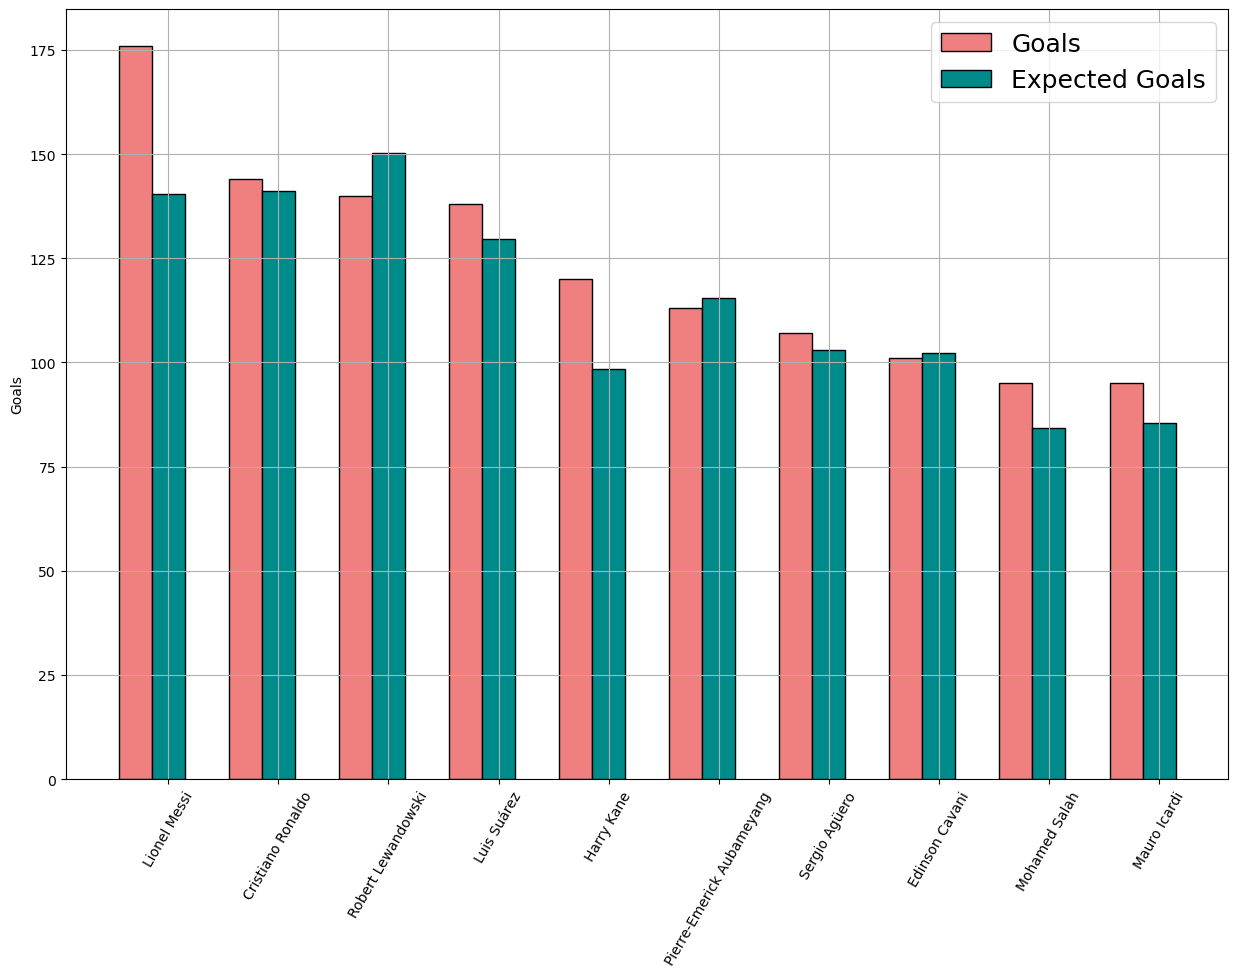

In [59]:

# width of the bars
plt.figure(figsize=(15,10)) 
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = dftestfinal.sort_values(by='npg',ascending=False)['npg'].head(10)
 
# Choose the height of the cyan bars
bars2 = dftestfinal.sort_values(by='npg',ascending=False)['npxG'].head(10)
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'lightcoral', edgecolor = 'black', capsize=7, label='Goals')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'darkcyan', edgecolor = 'black', capsize=7, label='Expected Goals')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], dftestfinal.sort_values(by='npg',ascending=False)['player_name'].head(10), rotation=60)
plt.ylabel('Goals')
plt.grid()
plt.legend(fontsize="18")
# Show graphic
plt.show()

In [34]:
# dftestfinal = dftest1.merge(dftest2, on='player_name')
# dftestfinal['npG/xnpG']=dftestfinal['npg']/dftestfinal['npxG']

In [35]:
# dftestfinal.sort_values(by='npG/xnpG', ascending=False).reset_index()

,index,player_name,npg,npxG,npG/xnpG
0,262,Sofiane Boufal,9,3.304950,2.723188
1,213,Jeremie Boga,11,4.567412,2.408366
2,157,James Rodríguez,13,5.519276,2.355381
3,266,Ryad Boudebouz,8,3.397532,2.354651
4,149,Sandro Ramírez,14,6.254508,2.238386
...,...,...,...,...,...
267,156,Chris Wood,13,16.465033,0.789552
268,270,Marco Mancosu,5,7.146213,0.699671
269,127,Martin Braithwaite,16,23.094969,0.692792
270,233,Aleksandar Mitrovic,10,14.691597,0.680661


In [46]:
dftestfinal.head(10)

,index,player_name,npg,npxG,npG/xnpG
0,64,Arjen Robben,28,14.951765,1.872689
1,75,Manolo Gabbiadini,25,13.902114,1.798288
2,91,Riyad Mahrez,22,14.502018,1.517030
3,61,Nabil Fekir,28,18.778321,1.491081
4,50,Eden Hazard,36,24.693795,1.457856
5,55,Iago Falque,33,22.643205,1.457391
6,60,Anthony Martial,28,19.752869,1.417516
7,89,Salomon Kalou,23,16.266301,1.413966
8,94,Gregoire Defrel,22,15.627038,1.407816
9,98,Domenico Berardi,21,15.009323,1.399130


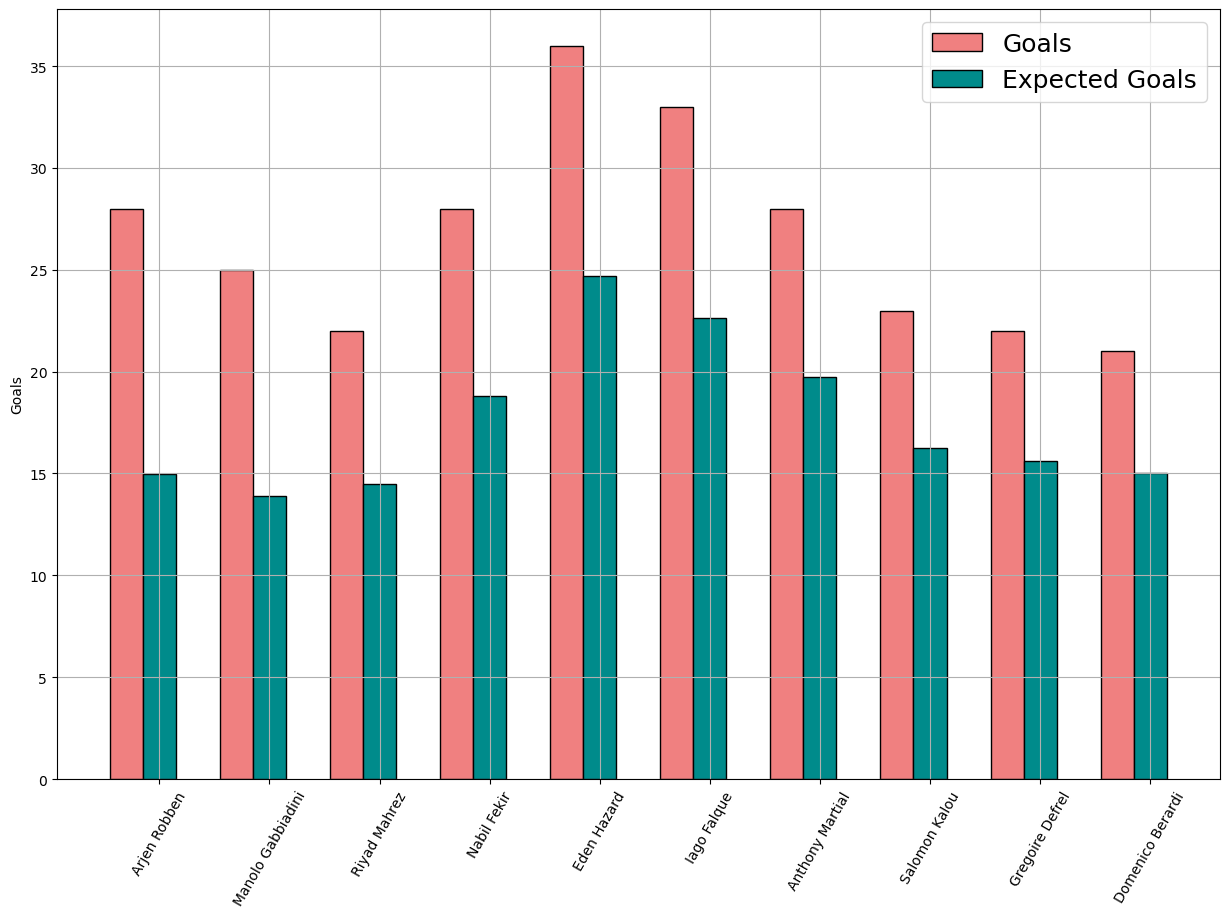

In [61]:

# width of the bars
plt.figure(figsize=(15,10)) 
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = dftestfinal['npg'].head(10)
 
# Choose the height of the cyan bars
bars2 = dftestfinal['npxG'].head(10)
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'lightcoral', edgecolor = 'black', capsize=7, label='Goals')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'darkcyan', edgecolor = 'black', capsize=7, label='Expected Goals')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], dftestfinal['player_name'].head(10), rotation=60)
plt.ylabel('Goals')
plt.grid()
plt.legend(fontsize="18")
# Show graphic
plt.show()

In [79]:
aaa = dftestfinal.head(10)

In [80]:
bbb = dftestfinal.sort_values(by='npg',ascending=False).head(10)

In [69]:
dftestfinal.sort_values(by='npg',ascending=False).head(10)

,index,player_name,npg,npxG,npG/xnpG
23,0,Lionel Messi,176,140.401038,1.253552
80,1,Cristiano Ronaldo,144,141.074275,1.020739
96,2,Robert Lewandowski,140,150.331898,0.931273
72,3,Luis Suárez,138,129.657524,1.064342
35,4,Harry Kane,120,98.482080,1.218496
89,5,Pierre-Emerick Aubameyang,113,115.350857,0.979620
78,6,Sergio Agüero,107,103.066076,1.038169
86,7,Edinson Cavani,101,102.141372,0.988826
60,8,Mohamed Salah,95,84.291664,1.127039
65,9,Mauro Icardi,95,85.524062,1.110799


In [89]:
aabb = aaa.append(bbb)


C:\Users\basil\AppData\Local\Temp\ipykernel_39096\4252982938.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aabb = aaa.append(bbb)


In [90]:
aabb

,index,player_name,npg,npxG,npG/xnpG
0,64,Arjen Robben,28,14.951765,1.872689
1,75,Manolo Gabbiadini,25,13.902114,1.798288
2,91,Riyad Mahrez,22,14.502018,1.517030
3,61,Nabil Fekir,28,18.778321,1.491081
4,50,Eden Hazard,36,24.693795,1.457856
5,55,Iago Falque,33,22.643205,1.457391
6,60,Anthony Martial,28,19.752869,1.417516
7,89,Salomon Kalou,23,16.266301,1.413966
8,94,Gregoire Defrel,22,15.627038,1.407816
9,98,Domenico Berardi,21,15.009323,1.399130


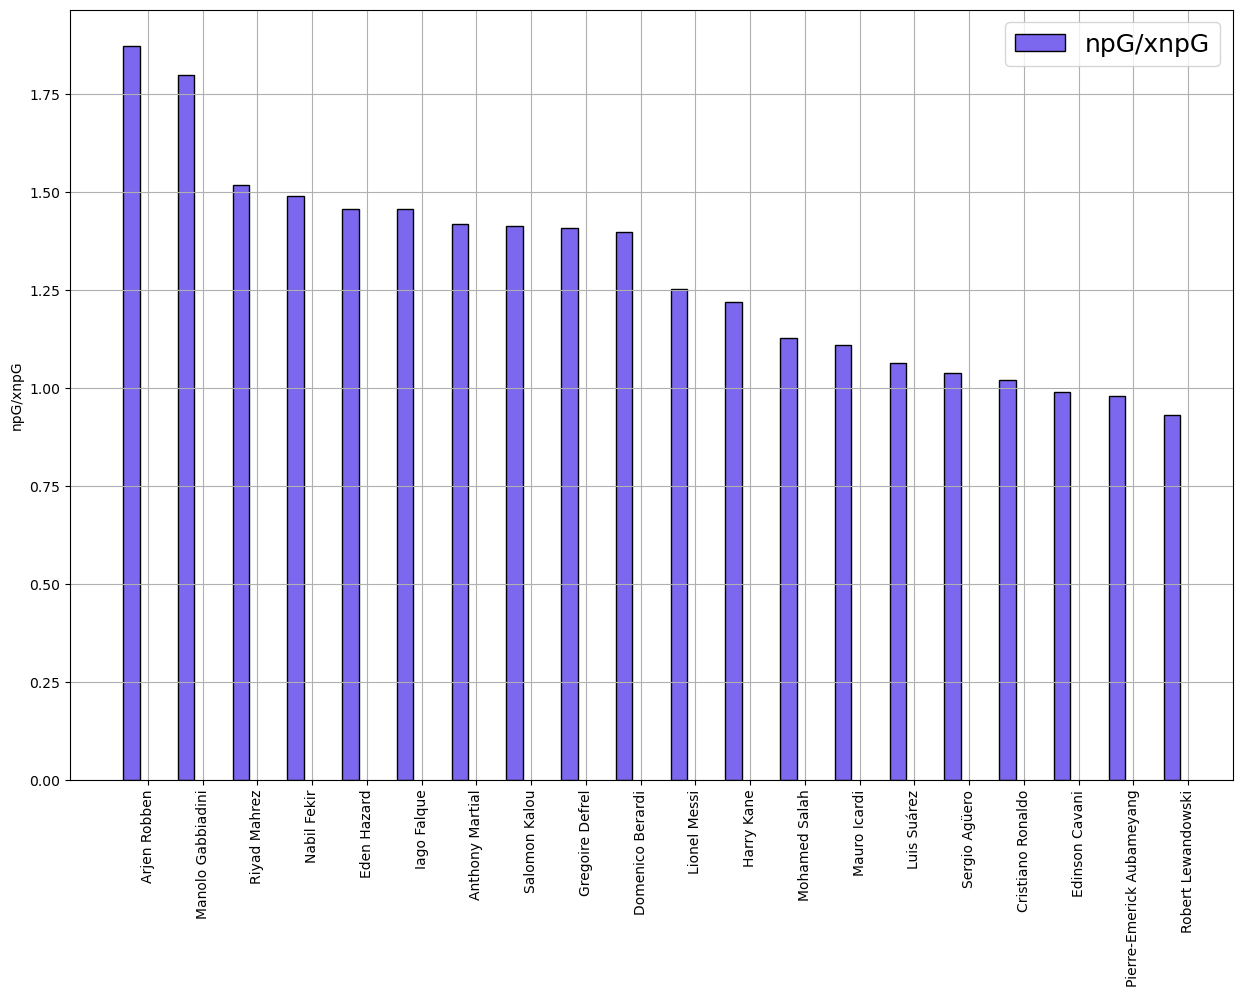

In [97]:

# width of the bars
plt.figure(figsize=(15,10)) 
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = aabb.sort_values(by='npG/xnpG',ascending=False)['npG/xnpG']

 
# The x position of bars
r1 = np.arange(len(bars1))
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'mediumslateblue', edgecolor = 'black', capsize=7, label='npG/xnpG')
 

# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], aabb.sort_values(by='npG/xnpG',ascending=False)['player_name'], rotation=90)
plt.ylabel('npG/xnpG')
plt.grid()
plt.legend(fontsize="18")
# Show graphic
plt.show()